In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
import logging
logging.basicConfig(level=logging.ERROR)

In [3]:
df, y = load_robot_execution_failures()
df.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


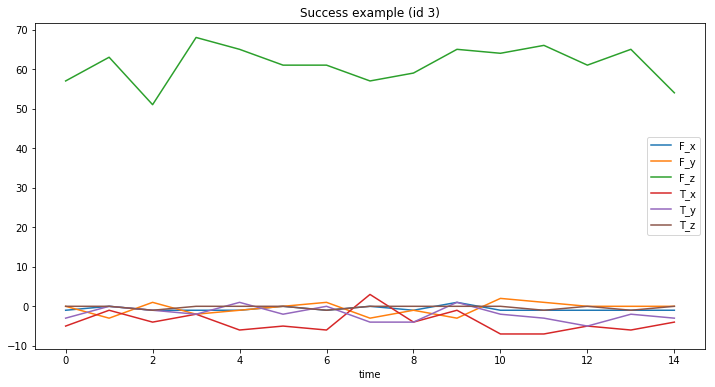

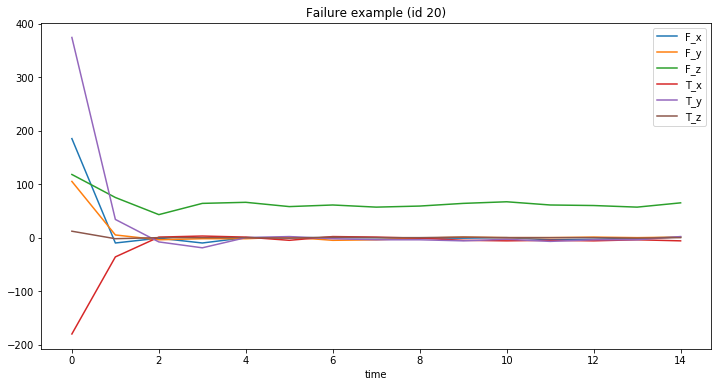

In [4]:
df[df.id == 3][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', 
                                                                        title='Success example (id 3)', 
                                                                        figsize=(12, 6));
df[df.id == 20][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time',
                                                                         title='Failure example (id 20)',
                                                                         figsize=(12, 6));

Extract Features

In [5]:
extraction_settings = ComprehensiveFCParameters()

In [6]:
X = extract_features(df, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute,
                    show_warnings=False)

Feature Extraction: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [7]:
# import pandas as pd
# pd.set_option('display.max_columns', 300)
X.tail()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__symmetry_looking__r_0.9,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
84,96833.0,100.0,-0.435813,-0.834371,0.538354,-25.0,-1.0,-77.0,0.0,0.0,...,1.0,1.0,-1254.846154,-3182.363636,-6043.333333,1.0,1.0,0.0,93.315556,1.0
85,1683.0,19.0,-0.599870,-0.438036,0.991429,12.0,1.0,7.0,0.0,0.0,...,1.0,1.0,-34.846154,-57.545455,-84.000000,1.0,1.0,0.0,4.648889,1.0
86,83497.0,127.0,-0.603352,-0.480226,0.994691,70.0,1.0,78.0,0.0,0.0,...,1.0,1.0,81.538462,141.000000,280.888889,0.0,0.0,1.0,29.840000,1.0
87,1405437.0,181.0,-0.455727,-0.435568,0.516457,340.0,1.0,2.0,0.0,0.0,...,1.0,1.0,8445.769231,16935.636364,25770.555556,0.0,0.0,0.0,98.088889,1.0
88,1427.0,11.0,-0.614351,-0.588781,1.121329,-6.0,-1.0,-4.0,0.0,0.0,...,1.0,1.0,14.230769,27.181818,36.222222,0.0,0.0,0.0,0.782222,0.0


In [95]:
# X_filtered = extract_relevant_features(df, y, 
#                                        column_id='id', column_sort='time', 
#                                        default_fc_parameters=extraction_settings)

In [96]:
# X_filtered.head()

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
# print(classification_report(y_test, cl.predict(X_test)))
print(f"""The accuracy for the model on the validation dataset is {accuracy_score(y_test,cl.predict(X_test))}""")

The accuracy for the model on the validation dataset is 0.9722222222222222


In [9]:
X_train['y'] =  y_train.astype('str')
X_test['y'] = y_test.astype('str')

In [10]:
X_test.columns

Index(['F_x__abs_energy', 'F_x__absolute_sum_of_changes',
       'F_x__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       'F_x__agg_autocorrelation__f_agg_"median"__maxlag_40',
       'F_x__agg_autocorrelation__f_agg_"var"__maxlag_40',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"',
       ...
       'T_z__symmetry_looking__r_0.9500000000000001',
       'T_z__time_reversal_asymmetry_statistic__lag_1',
       'T_z__time_reversal_asymmetry_statistic__lag_2',
       'T_z__time_reversal_asymmetry_statistic__lag_3',
       'T_z__value_count__value_-1', 'T_z__value_count__value_0',
       'T_z__value_count__value_1', 'T_z__variance',
       'T_z__variance_larger_than_

In [11]:
import swat
from _config import container_xl_19wk21_login
#Connect to the CAS Server
host = container_xl_19wk21_login()[2]
user = container_xl_19wk21_login()[0]
pswd = container_xl_19wk21_login()[1]
sess = swat.CAS(host,5570,user,pswd)
sess.setsessopt(caslib="casuser")

NOTE: 'CASUSER(sasdemo)' is now the active caslib.


+ Elapsed: 0.000728s, user: 0.000358s, sys: 0.0003s, mem: 0.23mb

In [12]:
cas_train=sess.upload(X_train,casout=dict(name='X_train',caslib='casuser',replace=True))
cas_test=sess.upload(X_test,casout=dict(name='X_test',caslib='casuser',replace=True))
cas_train

NOTE: Cloud Analytic Services made the uploaded file available as table X_TRAIN in caslib CASUSER(sasdemo).
NOTE: The table X_TRAIN has been created in caslib CASUSER(sasdemo) from binary data uploaded to Cloud Analytic Services.
NOTE: Cloud Analytic Services made the uploaded file available as table X_TEST in caslib CASUSER(sasdemo).
NOTE: The table X_TEST has been created in caslib CASUSER(sasdemo) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSER(sasdemo)'

[tableName]

 'X_TRAIN'

[casTable]

 CASTable('X_TRAIN', caslib='CASUSER(sasdemo)')

+ Elapsed: 1.86s, user: 1.82s, sys: 0.0669s, mem: 78.4mb

In [13]:
cas_train = cas_train.casTable

In [14]:
cas_train.head()

,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_deviation,y
0,7923.0,31.0,-0.436571,-0.574761,0.589561,-17.0,-1.0,-7.0,0.0,0.0,...,1.0,-46.769231,-202.181818,-309.777778,0.0,0.0,0.0,4.355556,1.0,False
1,106.0,22.0,-0.069140,-0.040761,0.098887,0.0,1.0,2.0,0.0,0.0,...,1.0,-1495.692308,-2128.727273,-1884.222222,1.0,0.0,0.0,70.328889,1.0,False
2,156905.0,62.0,-0.560658,-0.500278,0.836147,-59.0,-1.0,-56.0,0.0,0.0,...,1.0,110652.000000,200138.363636,286382.777778,0.0,0.0,0.0,470.026667,1.0,False
3,96833.0,100.0,-0.435813,-0.834371,0.538354,-25.0,-1.0,-77.0,0.0,0.0,...,1.0,-1254.846154,-3182.363636,-6043.333333,1.0,1.0,0.0,93.315556,1.0,False
4,1219.0,62.0,-0.226061,-0.270804,0.102505,4.0,-1.0,-5.0,0.0,0.0,...,1.0,38.846154,14.545455,19.666667,10.0,1.0,0.0,5.528889,1.0,False


In [15]:
cas_test= cas_test.casTable
cas_test.columns

Index(['F_x__abs_energy', 'F_x__absolute_sum_of_changes',
       'F_x__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       'F_x__agg_autocorrelation__f_agg_"median"__maxlag_40',
       'F_x__agg_autocorrelation__f_agg_"var"__maxlag_40',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"',
       ...
       'T_z__symmetry_looking__r_0.9500000000000001',
       'T_z__time_reversal_asymmetry_statistic__lag_1',
       'T_z__time_reversal_asymmetry_statistic__lag_2',
       'T_z__time_reversal_asymmetry_statistic__lag_3',
       'T_z__value_count__value_-1', 'T_z__value_count__value_0',
       'T_z__value_count__value_1', 'T_z__variance',
       'T_z__variance_larger_than_

In [16]:
sess.loadactionset(actionset="decisionTree")
sess.loadactionset(actionset="autotune")

NOTE: Added action set 'decisionTree'.
NOTE: Added action set 'autotune'.


[actionset]

 'autotune'

+ Elapsed: 0.00215s, user: 6.8e-05s, sys: 0.00204s, mem: 0.214mb

In [17]:
print(f"The training data is of the shape :- rows,cols = {cas_train.shape}")

The training data is of the shape :- rows,cols = (52, 4765)


In [18]:
variables = list(cas_train.columns)
target=variables.pop()
inputs=variables

In [21]:
forest_result = sess.autotune.tuneforest(trainoptions=
                                                    dict(
                                                        table = cas_train,
                                                        inputs = inputs,
                                                        target = target,
                                                        varimp = True,
                                                        casout = dict(name="auto_forest_model",replace=True),
                                                        savestate=dict(name="auto_forest_save",replace=True)
                                                    )
                                    )

NOTE: Autotune is started for 'Forest' model.
NOTE: Autotune option SEARCHMETHOD='GA'.
NOTE: Autotune option MAXTIME=36000 (sec.).
NOTE: Autotune option SEED=585875008.
NOTE: Autotune objective is 'Mean Square Error'.
NOTE: Autotune number of parallel evaluations is set to 4, each using 0 worker nodes.
         Iteration       Evals     Best Objective  Elapsed Time
                 0           1              18.75          0.86
                 1          19               6.25          4.45
                 2          34                  0          7.96
                 3          49                  0         11.15
                 4          63                  0         14.28
                 5          78                  0         17.43
NOTE: Data was partitioned during tuning, to tune based on validation score; the final model is trained and scored on all data.
NOTE: Wrote 1898267 bytes to the savestate file auto_forest_save.
NOTE: Autotune time is 19.57 seconds.


In [24]:
forest_result

,Descr,Value
0,Number of Trees,6.800000e+01
1,Number of Selected Variables (M),8.100000e+01
2,Random Number Seed,5.858750e+08
3,Bootstrap Percentage (%),9.000000e+01
4,Number of Bins,2.000000e+01
5,Number of Variables,4.764000e+03
6,Confidence Level for Pruning,2.500000e-01
7,Max Number of Tree Nodes,7.000000e+00
8,Min Number of Tree Nodes,3.000000e+00
9,Max Number of Branches,2.000000e+00


In [25]:
sess.loadactionset('astore')

NOTE: Added action set 'astore'.


[actionset]

 'astore'

+ Elapsed: 0.00166s, user: 0.000411s, sys: 0.0012s, mem: 0.211mb

Score the Test Table

In [26]:
sess.astore.score(table=cas_test,casout="forest_score", rstore="auto_forest_save")

[OutputCasTables]

              casLib          Name  Rows  Columns  \
 0  CASUSER(sasdemo)  forest_score    36        4   
 
                                             casTable  
 0  CASTable('forest_score', caslib='CASUSER(sasde...  

[Timing]

 Task Timing
 
                  Task   Seconds   Percent
 0   Loading the Store  0.000854  0.011163
 1  Creating the State  0.066741  0.872361
 2             Scoring  0.008904  0.116383
 3               Total  0.076506  1.000000

+ Elapsed: 0.0905s, user: 0.0824s, sys: 0.0186s, mem: 35.5mb

In [27]:
out = sess.CASTable('forest_score')
out.head()

,P_yFalse,P_yTrue,I_y,_WARN_
0,0.865686,0.134314,False,
1,0.362908,0.637092,True,
2,0.924930,0.075070,False,
3,0.970588,0.029412,False,
4,0.975630,0.024370,False,


In [28]:
out.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,NFL,NFD
0,P_yFalse,Predicted: y=False,1,double,8,12,0,0
1,P_yTrue,Predicted: y=True,2,double,8,12,0,0
2,I_y,Into: y,3,char,32,32,0,0
3,_WARN_,Warnings,4,char,4,4,0,0


In [29]:
out[out['I_y']!=cas_test['y']].head()

,P_yFalse,P_yTrue,I_y,_WARN_


In [30]:
sess.close()